## Lab6

### zad1

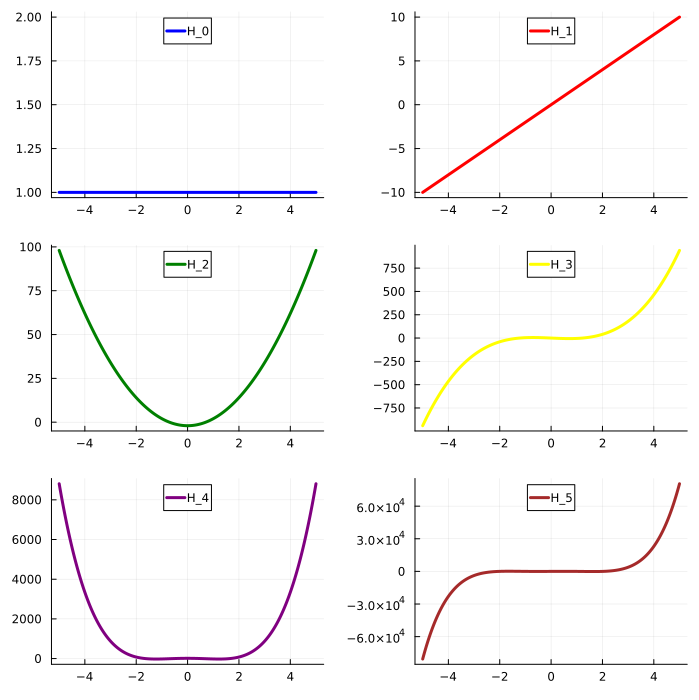

In [10]:
using Polynomials, SpecialPolynomials, Plots, LinearAlgebra, CSV, DataFrames

xs = -5:0.01:5
h0 = basis(Hermite, 0)
h1 = basis(Hermite, 1)
h2 = basis(Hermite, 2)
h3 = basis(Hermite, 3)
h4 = basis(Hermite, 4)
h5 = basis(Hermite, 5)
ys0 = [h0(x) for x in xs]
ys1 = [h1(x) for x in xs]
ys2 = [h2(x) for x in xs]
ys3 = [h3(x) for x in xs]
ys4 = [h4(x) for x in xs]
ys5 = [h5(x) for x in xs]

plot(
    size = (700,700),
    linewidth=3,
    xs,
    [ys0,ys1,ys2,ys3,ys4,ys5],
    layout=grid(3,2),
    color = [:blue :red :green :yellow :purple :brown],
    label = ["H_0" "H_1" "H_2" "H_3" "H_4" "H_5"],
    legend_position = :top
)

### zad2

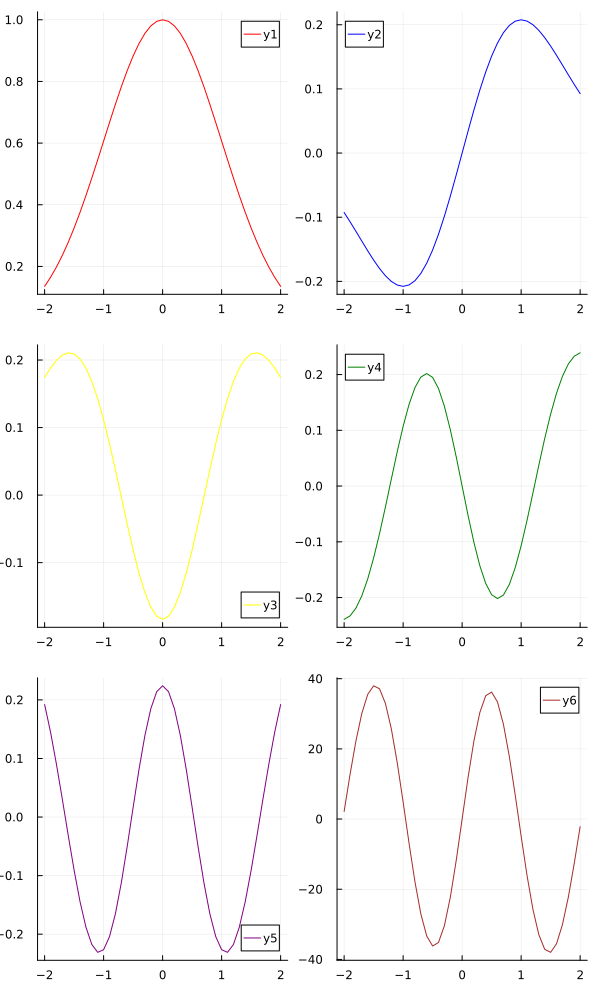

In [22]:
function base_fun(k, x, norm=true) # funkcje bazowe
    H_k = basis(Hermite, k).(x)
    base = H_k .* exp.(-(x.^2)/2)
    if norm
        return normalize(base)
    end
    return base
end

ys0 = base_fun(0, xs)
ys1 = base_fun(1, xs)
ys2 = base_fun(2, xs)
ys3 = base_fun(3, xs)
ys4 = base_fun(4, xs)
ys5 = base_fun(5, xs)

plot(
    xs,
    [ys0,ys1,ys2, ys3,ys4,ys5],
    layout = (3,2),
    size = (600,1000),
    color = ["red" "blue" "yellow" "green" "purple" "brown"]
)

### zad3

In [12]:
xs = -2:0.1:2
b0 = [h0(x) for x in xs]
b1 = [h1(x) for x in xs]
b2 = [h2(x) for x in xs]
b3 = [h3(x) for x in xs]
b4 = [h4(x) for x in xs]
b5 = [h5(x) for x in xs]

not_wage_function = Array{Float64, 2}(undef, 6, 6); 
with_wage_function = Array{Float64, 2}(undef, 6, 6); 

for (i, b_i) in enumerate([b0, b1, b2, b3, b4, b5]) # wielomiany Hermite'a
    for (j, b_j) in enumerate([b0, b1, b2, b3, b4, b5])
        not_wage_function[i,j] = dot(b_i, b_j)
    end
end

for (i, ys_i) in enumerate([ys0, ys1, ys2, ys3, ys4, ys5]) # funkcje bazowe
    for (j, ys_j) in enumerate([ys0, ys1, ys2, ys3, ys4, ys5])
        with_wage_function[i,j] = dot(ys_i, ys_j)
    end
end

not_wage_function     

6×6 Matrix{Float64}:
  41.0             -8.88178e-16  …     49.3312           -2.84217e-14
  -8.88178e-16    229.6                 0.0           -4768.28
 147.6              2.13163e-14      2612.51              1.93268e-12
  -7.10543e-15    934.931               9.09495e-13  -25596.8
  49.3312           0.0             24500.7              -4.54747e-13
  -2.84217e-14  -4768.28         …     -4.54747e-13       1.85742e5

In [13]:
with_wage_function

6×6 Matrix{Float64}:
  1.0          -1.28479e-18  -5.27334e-11  …  -7.17021e-10  -6.47107e-19
 -1.28479e-18   1.0           5.31317e-18     -2.94442e-18  -1.53835e-8
 -5.27334e-11   5.31317e-18   1.0             -2.59736e-8   -2.97486e-19
  8.37625e-19  -1.52538e-9   -8.56829e-18      3.30805e-18  -3.09764e-7
 -7.17021e-10  -2.94442e-18  -2.59736e-8       1.0           1.72026e-18
 -6.47107e-19  -1.53835e-8   -2.97486e-19  …   1.72026e-18   1.0

Widzimy, że macierz dla wektorów znormalizowanych jest symetryczna, a na przekątnych mamy wartości 1, zatem są one wektorami ortonormalnymi.

### zad4

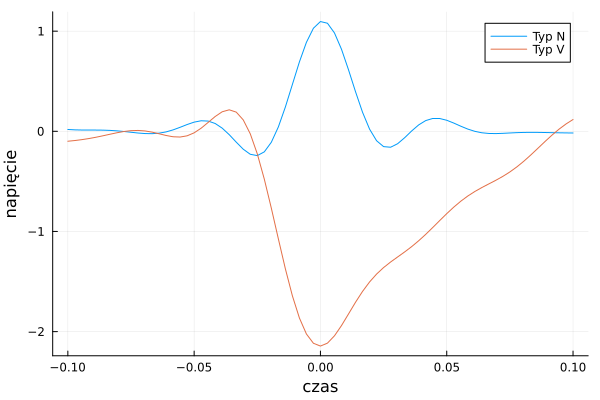

In [14]:
ekg_data = CSV.read("ecg_data.csv", DataFrame)
plot(ekg_data.time, ekg_data.signalN, label="Typ N", xlabel = "czas", ylabel="napięcie")
plot!(ekg_data.time, ekg_data.signalV, label="Typ V")

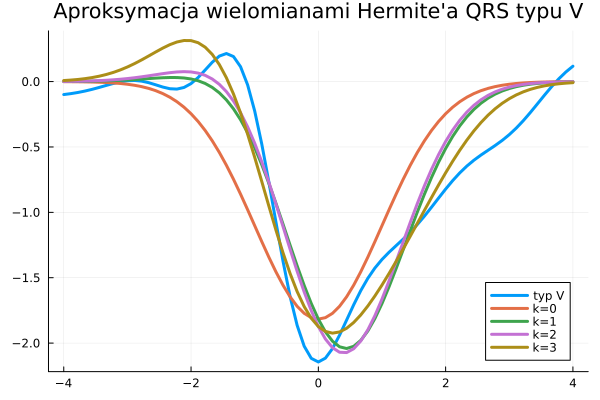

In [15]:
xx_ekg = ekg_data.time * 40 # aproksymacja kolejnymi stopniami wielomianów
yy_ekgV = ekg_data.signalV
ys0 = base_fun(0, xx_ekg) # Obliczenie funkcji bazowych
ys1 = base_fun(1, xx_ekg)
ys2 = base_fun(2, xx_ekg)
ys3 = base_fun(3, xx_ekg)
c0 = dot(yy_ekgV, ys0) # Obliczenie współczynników
c1 = dot(yy_ekgV, ys1)
c2 = dot(yy_ekgV, ys2)
c3 = dot(yy_ekgV, ys3)
V0 = c0 * ys0 # Wygenerowanie aproksymacji
V1 = c1 * ys1
V2 = c2 * ys2
V3 = c3 * ys3
V01 = V0 + V1 # Składanie aproksymacji
V012 = V01 + V2
V0123 = V012 + V3
plot(
    xx_ekg, 
    [yy_ekgV,V0,V01,V012,V0123],
    label=["typ V" "k=0" "k=1" "k=2" "k=3"],
    linewidth=3,
    title="Aproksymacja wielomianami Hermite'a QRS typu V"
)

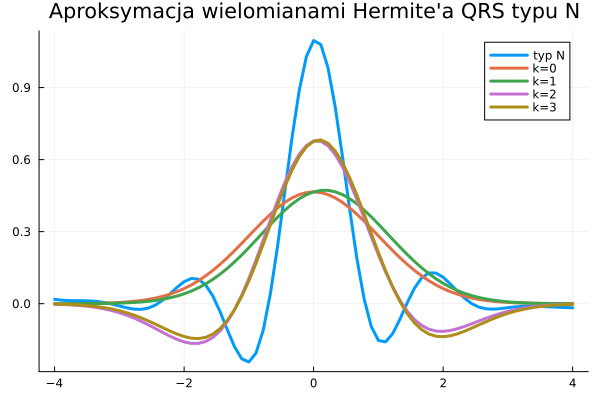

In [16]:
yy_ekgN = ekg_data.signalN
ys0 = base_fun(0, xx_ekg) 
ys1 = base_fun(1, xx_ekg)
ys2 = base_fun(2, xx_ekg)
ys3 = base_fun(3, xx_ekg)
c0 = dot(yy_ekgN, ys0)
c1 = dot(yy_ekgN, ys1)
c2 = dot(yy_ekgN, ys2)
c3 = dot(yy_ekgN, ys3)
V0 = c0 * ys0
V1 = c1 * ys1
V2 = c2 * ys2
V3 = c3 * ys3
V01 = V0 + V1
V012 = V01 + V2
V0123 = V012 + V3
plot(
    xx_ekg, 
    [yy_ekgN,V0,V01,V012,V0123],
    label=["typ N" "k=0" "k=1" "k=2" "k=3"],
    linewidth=3,
    title="Aproksymacja wielomianami Hermite'a QRS typu N"
)

### zad5

In [25]:
yy_ekgN = ekg_data.signalN
n = length(xx_ekg)

approx = [zeros(n) for _ in 0:20]
for i in 0:10
    y = base_fun(i,xx_ekg)
    c = dot(yy_ekgN,y)
    a = c * y
    approx[i+1] = a
end
approx[12] = approx[1] + approx[2]
for i in 3:11
    approx[i+10] = approx[i] + approx[i+9]
end


[0.05653083118425804, 0.055816908933032455, 0.03630893116640522, 0.036131760274550305, 0.017944119544999308, 0.017906033228894835, 0.005298139008481419, 0.005200288253318611, 0.0007040738883725692, 0.0007045246082865523, 0.00014609055577214763]

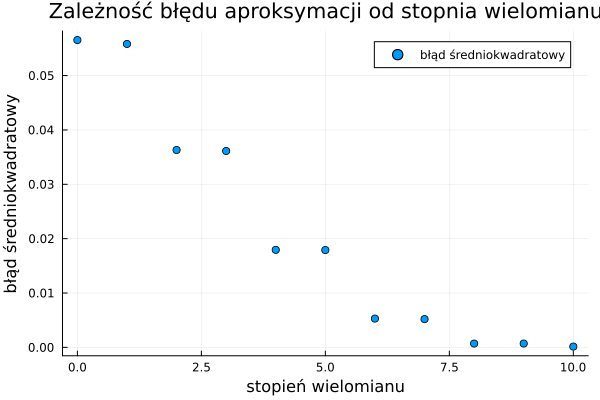

In [24]:
using Statistics

mse(y1, y2) = mean((y1-y2).^2)
epsilon = zeros(0)
append!(epsilon,mse(yy_ekgN,approx[1]))
for i in 12:21
    append!(epsilon,mse(yy_ekgN,approx[i]))
end

print(epsilon)

scatter( 
    0:1:10,
    epsilon,
    xlabel="stopień wielomianu",
    ylabel="błąd średniokwadratowy",
    label="błąd średniokwadratowy",
    title="Zależność błędu aproksymacji od stopnia wielomianu"
)

Widzimy jak zmienia się błąd aproksymacji wraz ze zwiększaniem stopnia wielomianu. Najlepsze jest użycie aproksykacji wielomianem stopnia 8.